In [1]:
%matplotlib inline   
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras #The deep learning model we will use to train our dataset will make use of this
import tensorflow as tf
from PIL import Image as IMG #To read the image file
import os #To move through the folders and fetching the images
import matplotlib.pyplot as plt #To render Plots of our data
import sklearn.model_selection as smodel #To split the data for training and cross validation set
# Any results you write to the current directory are saved as output.\
# Any results you write to the current directory are saved as output.

In [2]:
def countfile(root_dir):
    '''This function will move through all directory and 
    count the no. of images in our training set'''
    count = 0
    parent_folders = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    for characterfolder in parent_folders:
        if(os.path.isdir(characterfolder)):
            characterimage = [os.path.join(characterfolder,f) for f in os.listdir(characterfolder)]
            for image in characterimage:
                count += 1
    return count

In [3]:
def make_matrix(root_dir):
    '''This will make our feature matrix and label matrix used to train our model
    '''
    size = countfile(root_dir)
    X = np.zeros((size,32,32))
    Y = np.zeros((size,1),dtype='U12')
    #dtype='S140' previously
    Id = 0
    no_classes=0
    parent_folders = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    for characterfolder in parent_folders:
        if(characterfolder):
            no_classes+=1
            print(characterfolder," Class ",no_classes)
            characterimage = [os.path.join(characterfolder,f) for f in os.listdir(characterfolder)]
            for image in characterimage:
                I = np.array(IMG.open(image))#This will open the image and parse the data as it's pixel values
                X[Id] = I #Used to assign the pixel data for each image
                filepathTokens=image.split('/') 
                Y[Id] = (filepathTokens[-1].split('_')[-1]).split('\\')[0]
                Id += 1
    return X,Y

In [4]:
rootdir = "DevanagariHandwrittenCharacterDataset/Train/"  #This is our directory inside which all images are present in different subfolders.
X,Y = make_matrix(rootdir)

DevanagariHandwrittenCharacterDataset/Train/character_10_yna  Class  1
DevanagariHandwrittenCharacterDataset/Train/character_11_taamatar  Class  2
DevanagariHandwrittenCharacterDataset/Train/character_12_thaa  Class  3
DevanagariHandwrittenCharacterDataset/Train/character_13_daa  Class  4
DevanagariHandwrittenCharacterDataset/Train/character_14_dhaa  Class  5
DevanagariHandwrittenCharacterDataset/Train/character_15_adna  Class  6
DevanagariHandwrittenCharacterDataset/Train/character_16_tabala  Class  7
DevanagariHandwrittenCharacterDataset/Train/character_17_tha  Class  8
DevanagariHandwrittenCharacterDataset/Train/character_18_da  Class  9
DevanagariHandwrittenCharacterDataset/Train/character_19_dha  Class  10
DevanagariHandwrittenCharacterDataset/Train/character_1_ka  Class  11
DevanagariHandwrittenCharacterDataset/Train/character_20_na  Class  12
DevanagariHandwrittenCharacterDataset/Train/character_21_pa  Class  13
DevanagariHandwrittenCharacterDataset/Train/character_22_pha  Class

In [5]:
X

array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0.,   5., ..., 123.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0

In [6]:
Y

array([['yna'],
       ['yna'],
       ['yna'],
       ...,
       ['9'],
       ['9'],
       ['9']], dtype='<U12')

In [7]:
#This will make a dictionary with keys as the labels and value as the numeric label we want to assign to each string label
Yclass = {}
for i in range(len(np.unique(Y)[:])):
    Yclass[np.unique(Y)[i]] = i
Yclass

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'adna': 10,
 'ba': 11,
 'bha': 12,
 'cha': 13,
 'chha': 14,
 'chhya': 15,
 'da': 16,
 'daa': 17,
 'dha': 18,
 'dhaa': 19,
 'ga': 20,
 'gha': 21,
 'gya': 22,
 'ha': 23,
 'ja': 24,
 'jha': 25,
 'ka': 26,
 'kha': 27,
 'kna': 28,
 'la': 29,
 'ma': 30,
 'motosaw': 31,
 'na': 32,
 'pa': 33,
 'patalosaw': 34,
 'petchiryakha': 35,
 'pha': 36,
 'ra': 37,
 'taamatar': 38,
 'tabala': 39,
 'tha': 40,
 'thaa': 41,
 'tra': 42,
 'waw': 43,
 'yaw': 44,
 'yna': 45}

In [8]:
Yclass.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'adna', 'ba', 'bha', 'cha', 'chha', 'chhya', 'da', 'daa', 'dha', 'dhaa', 'ga', 'gha', 'gya', 'ha', 'ja', 'jha', 'ka', 'kha', 'kna', 'la', 'ma', 'motosaw', 'na', 'pa', 'patalosaw', 'petchiryakha', 'pha', 'ra', 'taamatar', 'tabala', 'tha', 'thaa', 'tra', 'waw', 'yaw', 'yna'])

In [10]:
def yvectorize(dict,data):
    '''This will assign the numeric label to each string label in the label matrix'''
    return dict[data]
vect = np.vectorize(yvectorize)
Y = vect(Yclass,Y)

Y

#Same thing done differently by me
#for key in Yclass.keys():
#    for i in range(0,Y.size):
#        if(Y[i]==key):
#            Y[i]=Yclass[key]
#Y = Y.astype('int32')
#Y

array([[45],
       [45],
       [45],
       ...,
       [ 9],
       [ 9],
       [ 9]])

In [11]:
Y.dtype

dtype('int32')

In [12]:
X.shape

(78200, 32, 32)

In [13]:
Y.shape

(78200, 1)

In [14]:
x_train,x_test,y_train,y_test = smodel.train_test_split(X,Y,test_size=0.25) #This will split the matrix into train and cross validation matrix

Text(0.5, 0, 'la')

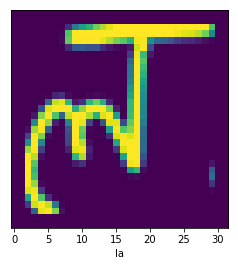

In [31]:
#to find the character name by it's label
def charactername(dic,label):
    for key, value in dic.items():    # for name, age in list.items():  (for Python 3.x)
        if(value == label):
            return (key)
        
#To print a random image and it's label from trainig set
rand = np.random.randint(1,100)
plt.figure()
plt.imshow(x_train[rand])
#plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel(charactername(Yclass,y_train[rand]))

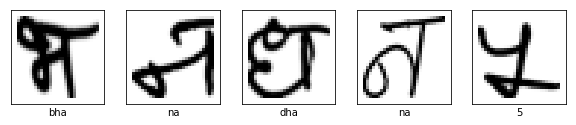

In [34]:
"""let's plot 5 random train set images """
plt.figure(figsize=(10,10))
rand = np.random.randint(1,1000,5)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[rand[i]], cmap=plt.cm.binary)
    plt.xlabel(charactername(Yclass,y_train[rand[i]]))

In [35]:
#Let's normalise the feature matrix 
"""The value of feature matrix are in range 0 - 255"""
x_train = (x_train-np.mean(x_train))/np.std(x_train)
x_test = (x_test-np.mean(x_test))/np.std(x_test)

In [36]:
x_train.shape

(58650, 32, 32)

In [37]:
y_train.shape

(58650, 1)

In [38]:
x_test.shape

(19550, 32, 32)

In [39]:
y_test.shape

(19550, 1)

In [40]:
np.save('x_train', x_train)
np.save('y_train', y_train)
np.save('x_test', x_test)
np.save('y_test', y_test)

In [ ]:
"""Let's train our model using three models ##first model has two layers only 
Second model has two layers with middle layer having 128 nodes
And third model has three layers with second layer having 256 nodes, Third layer with 128 nodes
Final layer in each model has 46 nodes as there are 36 alphabet and 10 digits in our data
We are doing this to find whether accuracy increases or decreases with addition of layers"""
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])


model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])
modellist = {'model1':model1,'model2':model2,'model3':model3}


In [ ]:
"""Compiling our models"""
for k in modellist:
    modellist[k].compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
"""To note the value of epochs in corresponding model and train and test accuracy with that given model and epochs"""
epo = {'model1':[],'model2':[],'model3':[]}
trainacc = {'model1':[],'model2':[],'model3':[]}
testacc = {'model1':[],'model2':[],'model3':[]}
def trainandaccuracy(epochs,model,i):
    print("--"*20)
    print(i,epochs)
    model.fit(x_train,y_train, epochs=epochs)
    test_loss, test_acc = model.evaluate(x_test,y_test)
    train_loss, train_acc = model.evaluate(x_train,y_train)
    epo[i].append(epochs)
    trainacc[i].append(train_acc)
    testacc[i].append(test_acc)

In [ ]:
"""To train models with epochs 5  with all the three model we have created"""
for i in modellist:
    trainandaccuracy(5,modellist[i],i)

In [ ]:
"""To plot the train and test accuracy with different models and different epochs"""
for i in modellist:
    print(i)
    plt.figure()
    plt.plot(epo[i],trainacc[i],label="Train Accuracy")
    plt.plot(epo[i],testacc[i],label="Test Accuracy")
    plt.title("Accuracy vs epoch for  "+i)
    plt.xlabel("epoch")
    plt.ylabel("Accuracy")
    plt.legend()

In [ ]:
"""Let's visualize some images that are predicted by our models on cross validation set
"""
for j in modellist:
    predictions = np.argmax(modellist[j].predict(x_test),axis=1)
    plt.figure(figsize=(10,10))
    rand = np.random.randint(1,23000,25)
    for i in range(len(rand)):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid('off')
        plt.imshow(x_test[rand[i]], cmap=plt.cm.binary)
        plt.xlabel(charactername(Yclass,predictions[rand[i]]))
        plt.suptitle("predicted label for random digit using "+j)